![1](1.png)

![2](2.png)

In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np

In [2]:
test = pd.read_csv("/Users/laikaiwen/Desktop/management science/group hw3/wholesale_customers_test.csv")
train = pd.read_csv("/Users/laikaiwen/Desktop/management science/group hw3/wholesale_customers_data.csv")
ds1 = pd.read_csv("/Users/laikaiwen/Desktop/management science/group hw3/DS1.csv")
ds2 = pd.read_csv("/Users/laikaiwen/Desktop/management science/group hw3/DS2.csv")

# Question 3.1

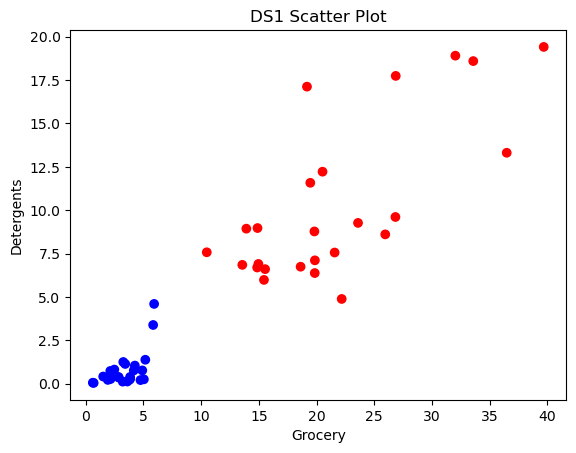

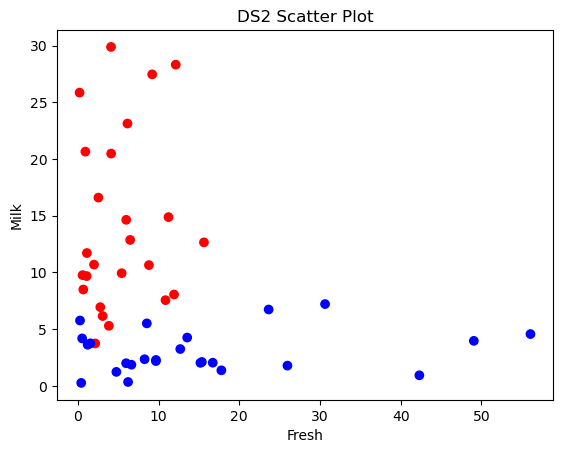

In [3]:
color_map = {1: 'red', -1: 'blue'}

# For DS1
plt.figure()
plt.scatter(ds1['Grocery'], ds1['Detergents'], color=[color_map[channel] for channel in ds1['Channel']])
plt.xlabel('Grocery')
plt.ylabel('Detergents')
plt.title('DS1 Scatter Plot')
plt.show()

# For DS2
plt.figure()
plt.scatter(ds2['Fresh'], ds2['Milk'], color=[color_map[channel] for channel in ds2['Channel']])
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('DS2 Scatter Plot')
plt.show()


# Question 3.2

In [4]:
from pyomo.environ import *

# Create a Concrete Model in Pyomo
model = ConcreteModel()

points = ds1[['Grocery', 'Detergents']].values
label = ds1['Channel'].values

# Variables
model.w = Var(range(2), domain=Reals)  # weights 
model.o = Var(domain=Reals)  # w0 

# Objective
model.obj = Objective(expr=sum(model.w[i]**2 for i in range(2)), sense=minimize)

def svm_constraints(model, i):
    return label[i] * (sum(model.w[j] * points[i, j] for j in range(2)) + model.o) >= 1

# Constraints
model.constraints = ConstraintList()

for i in range(50):
    model.constraints.add(svm_constraints(model, i))

# Use Gurobi solver to solve the optimization problem
solver = SolverFactory('gurobi')

results = solver.solve(model)

#Getting all values
coefficients = [value(model.w[i]) for i in range(2)]
wo = value(model.o)

print("Coefficients:", coefficients)
print("intercept:", wo)

Coefficients: [0.3074164041542541, 0.20052117321394836]
intercept: -3.7422221534240725


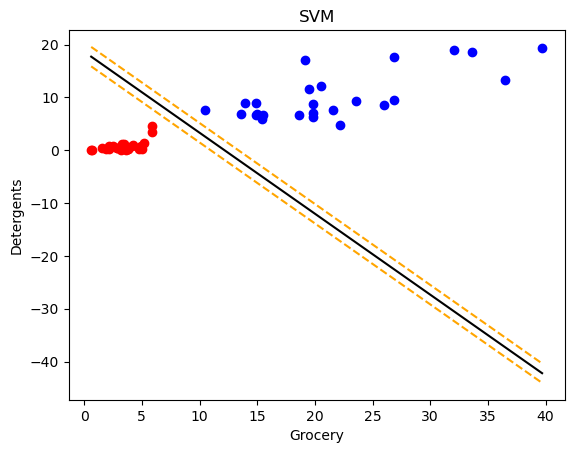

In [5]:
for i,j in enumerate(label):
    if j == -1:
        plt.scatter(points[i, 0], points[i, 1], color='red')
    else:
        plt.scatter(points[i, 0], points[i, 1], color='blue')

# Plotting the decision boundary
# The line is w_1*x + w_2*y + b = 0 => y = -(w_1/w_2)*x - (b/w_2)
x_values = np.linspace(np.min(points[:, 0]), np.max(points[:, 0]), num=100) # Generate 100 points between the min and max of feature 1
y_values = -(coefficients[0]/coefficients[1])*x_values - (wo/coefficients[1])

plt.plot(x_values, y_values, color='black')  # decision boundary

# Plotting the two outer lines
margin = 1 / np.sqrt(np.sum(coefficients[0] ** 2+coefficients[1]))
y_values_upper = y_values + margin
y_values_lower = y_values - margin

plt.plot(x_values, y_values_upper, color='orange', linestyle='dashed')
plt.plot(x_values, y_values_lower, color='orange', linestyle='dashed')

# Setting additional plot attributes for clarity
plt.xlabel('Grocery')
plt.ylabel('Detergents')
plt.title('SVM')
plt.show()

# Quwstion 3.3

In [6]:
# Create a Concrete Model in Pyomo
model = ConcreteModel()

points = ds2[['Fresh', 'Milk']].values
label = ds2['Channel'].values

# Variables
model.w = Var(range(2), domain=Reals)  # weights 
model.o = Var(domain=Reals)  # w0 

# Objective
model.obj = Objective(expr=sum(model.w[i]**2 for i in range(2)), sense=minimize)

def svm_constraints(model, i):
    return label[i] * (sum(model.w[j] * points[i, j] for j in range(2)) + model.o) >= 1

# Constraints
model.constraints = ConstraintList()

for i in range(50):
    model.constraints.add(svm_constraints(model, i))

# Use Gurobi solver to solve the optimization problem
solver = SolverFactory('gurobi')

results = solver.solve(model)

#Getting all values
coefficients = [value(model.w[i]) for i in range(2)]
wo = value(model.o)

print("Coefficients:", coefficients)
print("intercept:", wo)

model.name="unknown";
    - termination condition: infeasibleOrUnbounded
    - message from solver: Problem proven to be infeasible or unbounded.
ERROR: evaluating object as numeric value: w[0]
        (object: <class 'pyomo.core.base.var._GeneralVarData'>)
    No value for uninitialized NumericValue object w[0]


ValueError: No value for uninitialized NumericValue object w[0]

# Question 3.4

# Question 3.5

In [7]:
# Create a Concrete Model in Pyomo
model = ConcreteModel()

# α = 1
points = ds2[['Fresh', 'Milk']].values
label = ds2['Channel'].values
alpha = 1

# Variables
model.w = Var(range(2), domain=Reals)  #weights
model.o = Var(domain=Reals)  # wo
model.u = Var(range(50), domain=NonNegativeReals)  # deviations from the goal

# Objective
model.obj = Objective( expr=sum(model.w[i]**2 for i in range(2)) + alpha * sum(model.u[j] for j in range(50)),sense=minimize)

# Constraints
def svm_constraints(model, i):
    return label[i] * (sum(model.w[j] * points[i, j] for j in range(2)) + model.o) >= 1 - model.u[i]

model.constraints = ConstraintList()
for i in range(50):
    model.constraints.add(svm_constraints(model, i))

# Use Gurobi solver to solve the optimization problem
solver = SolverFactory('gurobi')

results = solver.solve(model, tee=True)

# results
coefficients = [value(model.w[i]) for i in range(2)]
intercept = value(model.o)

print("Coefficients: ", coefficients)
print("intercept: ", intercept)
# deviation
u_values = [value(model.u[i]) for i in range(50)]
print("deviation:", u_values)

Restricted license - for non-production use only - expires 2025-11-24
Read LP format model from file /var/folders/1k/03gv_xvd763c_7v1mkkyhljr0000gn/T/tmpbmmss8sw.pyomo.lp
Reading time = 0.00 seconds
x1: 50 rows, 53 columns, 200 nonzeros
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 21.6.0 21G726)

CPU model: Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 50 rows, 53 columns and 200 nonzeros
Model fingerprint: 0xd22d0347
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-01, 6e+01]
  Objective range  [1e+00, 1e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.00s
Presolved: 50 rows, 53 columns, 200 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 3
 AA' NZ     : 1.225e+03
 Factor NZ  : 1.275e+03
 Factor

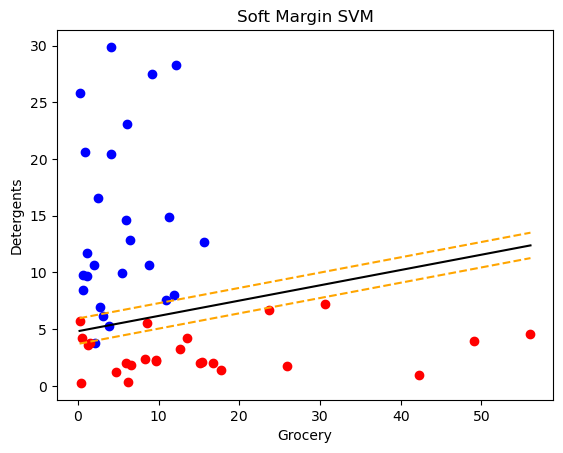

In [8]:
# Plotting
for i,j in enumerate(label):
    if j == -1:
        plt.scatter(points[i, 0], points[i, 1], color='red')
    else:
        plt.scatter(points[i, 0], points[i, 1], color='blue')

x_values = np.linspace(points[:, 0].min(), points[:, 0].max(), 100)

y_values = -(coefficients[0]/coefficients[1]) * x_values - (intercept/coefficients[1])

# Plotting the decision boundary
plt.plot(x_values, y_values, color='black')

# Plotting the two outer lines
margin = 1 / np.sqrt(np.sum(coefficients[0] ** 2+coefficients[1]))
y_values_upper = y_values + margin
y_values_lower = y_values - margin

plt.plot(x_values, y_values_upper, color='orange', linestyle='dashed')
plt.plot(x_values, y_values_lower, color='orange', linestyle='dashed')

# Additional plot settings
plt.xlabel('Grocery')
plt.ylabel('Detergents')
plt.title('Soft Margin SVM')
plt.show()

# Question 3.6

In [9]:
points = train[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents', 'Delicassen']].values
points.shape 

(50, 6)

In [12]:
# Create a Concrete Model in Pyomo
model = ConcreteModel()

points = train[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents', 'Delicassen']].values
label = train['Channel'].values
# α= 1
alpha = 1 


# Variables
model.w = Var(range(6), domain=Reals)  # Weights
model.a = Var(range(6), domain=NonNegativeReals)  # Auxiliary variables
model.o = Var(domain=Reals)  # wo
model.u = Var(range(50), domain=NonNegativeReals)  # deviation from the goal

# Objective
model.obj = Objective(expr=sum(model.a[i] for i in range(6)) + alpha * sum(model.u[j] for j in range(50)), sense=minimize)

#svm constraint
def svm_constraint(model, i):
    return label[i] * (sum(model.w[j] * points[i, j] for j in range(6)) + model.o) >= 1 - model.u[i]

model.svm_constraints = ConstraintList()
for i in range(50):
    model.svm_constraints.add(svm_constraint(model, i))

# abs constraints
def abs_constraint1(model, i):
    return model.a[i] >= model.w[i]

def abs_constraint2(model, i):
    return model.a[i] >= -model.w[i]

model.abs_constraints1 = Constraint(range(6), rule=abs_constraint1)
model.abs_constraints2 = Constraint(range(6), rule=abs_constraint2)


# Use Gurobi solver to solve the optimization problem
solver = SolverFactory('gurobi')
results = solver.solve(model, tee=True)

# print the solution
coefficients_6 = [value(model.w[i]) for i in range(6)]
intercept_6 = value(model.o)
deviation = [value(model.u[i]) for i in range(50)]
print("Coefficients:", coefficients_6)
print("intercept:", intercept_6)
print("deviation:", deviation)


Restricted license - for non-production use only - expires 2025-11-24
Read LP format model from file /var/folders/1k/03gv_xvd763c_7v1mkkyhljr0000gn/T/tmpeo0l0hs_.pyomo.lp
Reading time = 0.00 seconds
x1: 62 rows, 63 columns, 424 nonzeros
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 21.6.0 21G726)

CPU model: Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 62 rows, 63 columns and 424 nonzeros
Model fingerprint: 0x78f21037
Coefficient statistics:
  Matrix range     [4e-02, 6e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.00s
Presolved: 62 rows, 63 columns, 424 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0      handle free variables                          0s
      19    4.3634369e-01   0.000000e+00   0.000000e+00      0s

Solved in 19 iterations and 0.00 second

# Question3.7

In [13]:
# Create a Concrete Model in Pyomo
model = ConcreteModel()

points = train[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents', 'Delicassen']].values
label = train['Channel'].values
# α= 1
alpha = 1 


# Variables
model.w = Var(range(6), domain=Reals)  # Weights
model.m = Var(domain=NonNegativeReals) # maximum absolute value
model.o = Var(domain=Reals)  # wo
model.u = Var(range(50), domain=NonNegativeReals)  # deviation from the goal

# Objective
model.obj = Objective(expr=model.m + alpha * sum(model.u[j] for j in range(50)), sense=minimize)

#svm constraint
def svm_constraint(model, i):
    return label[i] * (sum(model.w[j] * points[i, j] for j in range(6)) + model.o) >= 1 - model.u[i]

model.svm_constraints = ConstraintList()
for i in range(50):
    model.svm_constraints.add(svm_constraint(model, i))

# abs constraints
def abs_constraint1(model, i):
    return model.m >= model.w[i]

def abs_constraint2(model, i):
    return model.m >= -model.w[i]

model.abs_constraints1 = Constraint(range(6), rule=abs_constraint1)
model.abs_constraints2 = Constraint(range(6), rule=abs_constraint2)


# Use Gurobi solver to solve the optimization problem
solver = SolverFactory('gurobi')
results = solver.solve(model, tee=True)

# print the solution
coefficients_7 = [value(model.w[i]) for i in range(6)]
intercept_7 = value(model.o)
deviation = [value(model.u[i]) for i in range(50)]
print("Coefficients:", coefficients_7)
print("intercept:", intercept_7)
print("deviation:", deviation)


Restricted license - for non-production use only - expires 2025-11-24
Read LP format model from file /var/folders/1k/03gv_xvd763c_7v1mkkyhljr0000gn/T/tmp8a3fywtb.pyomo.lp
Reading time = 0.00 seconds
x1: 62 rows, 58 columns, 424 nonzeros
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 21.6.0 21G726)

CPU model: Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 62 rows, 58 columns and 424 nonzeros
Model fingerprint: 0x9fe56e8a
Coefficient statistics:
  Matrix range     [4e-02, 6e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.00s
Presolved: 62 rows, 58 columns, 424 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0      handle free variables                          0s
      16    1.5948361e-01   0.000000e+00   0.000000e+00      0s

Solved in 16 iterations and 0.00 second

# Question 3.8

In [14]:
#evaluating question 3.6

correct = 0
for index, row in test.iterrows():
    f_xj = sum([row['Fresh']*coefficients_6[0], row['Milk']*coefficients_6[1], row['Grocery']*coefficients_6[2],row['Frozen']*coefficients_6[3], row['Detergents']*coefficients_6[4], row['Delicassen']*coefficients_6[5]]) + intercept_6
    if (f_xj > 0 and row['Channel'] > 0) or (f_xj < 0 and row['Channel'] < 0):
        correct += 1


print(f"Correctly classified {correct}")

Correctly classified 45


In [15]:
#evaluating question 3.7
correct = 0
for index, row in test.iterrows():
    f_xj = sum([row['Fresh']*coefficients_7[0], row['Milk']*coefficients_7[1], row['Grocery']*coefficients_7[2],row['Frozen']*coefficients_7[3], row['Detergents']*coefficients_7[4], row['Delicassen']*coefficients_7[5]]) + intercept_7
    if (f_xj > 0 and row['Channel'] > 0) or (f_xj < 0 and row['Channel'] < 0):
        correct += 1


print(f"Correctly classified {correct}")

Correctly classified 42
